In [26]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np 
from keras.datasets import fashion_mnist

In [44]:
import sys
import pickle
import gzip
f = gzip.open('train-images-idx3-ubyte.pickle', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
import numpy as np
(x_train, _), (x_test, _) = data

UnpicklingError: invalid load key, '\x00'.

In [69]:
import sys
import pickle
import gzip
f = gzip.open('mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    data = pickle.load(f)
else:
    data = pickle.load(f, encoding='bytes')
f.close()
import numpy as np
(x_train, y_train), (x_test, y_test) = data

In [70]:

print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)



X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [75]:

from tensorflow.keras.utils import plot_model
# Build a simpl1e model
model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(scale=1.0/255, input_shape=(28, 28)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
plot_model(model,to_file='multilayer_perceptron_graph.png')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 28, 28)            0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               100480    
                                                                 
 dense_9 (Dense)             (None, 128)               16512     
                                                                 
 dense_10 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and

In [76]:


model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=10)



Fit on NumPy data
Epoch 1/10
938/938 [==============================] - 5s 4ms/step - loss: 0.2524 - sparse_categorical_accuracy: 0.9255
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1068 - sparse_categorical_accuracy: 0.9677
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0754 - sparse_categorical_accuracy: 0.9766
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0592 - sparse_categorical_accuracy: 0.9819
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0475 - sparse_categorical_accuracy: 0.9859
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0395 - sparse_categorical_accuracy: 0.9884
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0331 - sparse_categorical_accuracy: 0.9901
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0273 - sparse_categorical_accuracy: 0.9917
Epoch 9/10
938/938 [==========

In [77]:


result = model.evaluate(x_test, y_test, verbose=2)
print(result)



313/313 - 1s - loss: 0.0949 - sparse_categorical_accuracy: 0.9789 - 722ms/epoch - 2ms/step
[0.09488321840763092, 0.9789000153541565]


In [85]:
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:5])
print("predictions shape:", np.argmax(predictions, axis=1))

Generate predictions for 3 samples
1/1 [==============================] - 0s 25ms/step
predictions shape: [7 2 1 0 4]


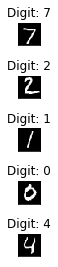

In [87]:
fig = plt.figure()
for i in range(5):
    plt.subplot(5,1,i+1)
    plt.tight_layout()
    plt.imshow(x_test[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

In [ ]:
"""
we use the "sparse_categorical_cross
entropy" loss because we have sparse labels ( for each instance, there is just a tar‐
get class index, from 0 to 9 in this case), and the classes are exclusive.

If instead wehad one target probability per class for each instance (such as one-hot vectors, e.g.
[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would
need to use the "categorical_crossentropy" loss instead.

If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e.,
logistic) activation function in the output layer instead of the "softmax" activation
function, and we would use the "binary_crossentropy" loss.
"""

In [88]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [89]:
model = keras.models.Sequential([
keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)


Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 1.0777 - val_loss: 5.0642
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6305 - val_loss: 0.4873
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4442 - val_loss: 0.4386
Epoch 4/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4126 - val_loss: 0.4215
Epoch 5/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4012 - val_loss: 0.4210
Epoch 6/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3898 - val_loss: 0.4041
Epoch 7/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3869 - val_loss: 0.3932
Epoch 8/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3822 - val_loss: 0.3930
Epoch 9/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3793 - val_loss: 0.4331
Epoch 10/20
363/363 [==============================] - 1s 3ms/step - loss: 0.3760 - val_loss: 0.3897

In [90]:
X_new = X_test[:3] # pretend these are new instances
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 133ms/step
